In [12]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras import models
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
%matplotlib inline

ModuleNotFoundError: No module named 'librosa'

In [14]:
def create_spectrogram(audio_file):
    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)

    log_ms = librosa.power_to_db(ms, ref=np.max)
    return y, sr, log_ms
    

def create_spectrogram_image(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr, log_ms = create_spectrogram(audio_file)

    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram_image(input_file, output_file)



In [16]:
create_pngs_from_wavs('./dataset/bus', './Spectogram_images/bus')
create_pngs_from_wavs('./dataset/tram', './Spectogram_images/tram')


NameError: name 'os' is not defined

In [ ]:
def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(tf.keras.utils.img_to_array(tf.keras.utils.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

        
x = []
y = []

In [ ]:
images, labels = load_images_from_path('./Spectogram_images/bus', 0)
x += images
y += labels

show_images(images)

In [ ]:
images, labels = load_images_from_path('./Spectogram_images/tram', 1)
x += images
y += labels

show_images(images)

In [8]:
print(f'x size: {len(x)}')
print(f'y size: {len(y)}')

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded =  tf.keras.utils.to_categorical(y_train)
y_test_encoded =  tf.keras.utils.to_categorical(y_test)

NameError: name 'x' is not defined

In [10]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

NameError: name 'models' is not defined

In [14]:
print(f'x_train_norm: {x_train_norm.shape}')
print(f'x_test_norm: {x_test_norm.shape}')

print(f'y_train_encoded: {y_train_encoded.shape}')
print(f'y_test_encoded: {y_test_encoded.shape}')


hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)


x_train_norm: (219, 224, 224, 3)
x_test_norm: (95, 224, 224, 3)
y_train_encoded: (219, 2)
y_test_encoded: (95, 2)
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 362ms/step - accuracy: 0.5085 - loss: 1.1036 - val_accuracy: 0.6105 - val_loss: 0.6535
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 339ms/step - accuracy: 0.7273 - loss: 0.5781 - val_accuracy: 0.7263 - val_loss: 0.4939
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 336ms/step - accuracy: 0.7238 - loss: 0.4820 - val_accuracy: 0.6000 - val_loss: 1.6505
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 338ms/step - accuracy: 0.6424 - loss: 0.8772 - val_accuracy: 0.8211 - val_loss: 0.4567
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 347ms/step - accuracy: 0.7974 - loss: 0.4302 - val_accuracy: 0.7053 - val_loss: 0.5929
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 357ms/step - accuracy: 0.8256 - loss: 0.3655 - val_accuracy: 0.8737 - val_loss: 0.2837
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 361ms/step - accuracy: 0.9022 - loss: 0.2348 - val_accuracy: 0.9053 - val_los

[]

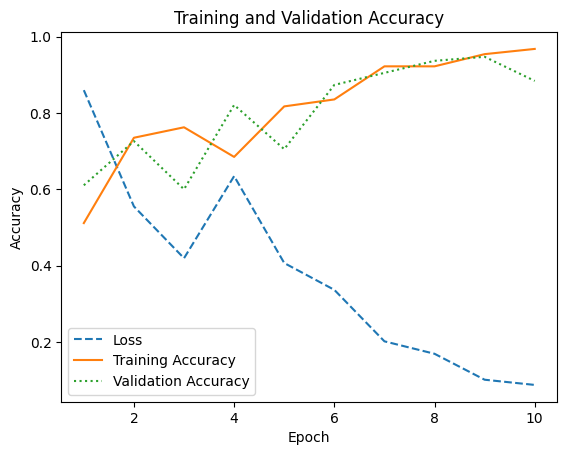

In [15]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
loss = hist.history['loss']

plt.plot(epochs, loss, '--', label='Loss')
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.plot()

In [16]:
model.save('vehicle-audio-processing-model.keras')

In [17]:
create_pngs_from_wavs('./test_audio', './Spectogram_images/test')


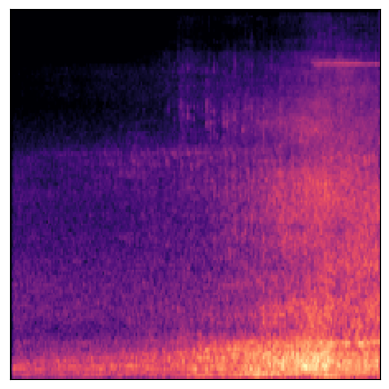

In [25]:
x = tf.keras.utils.load_img('./Spectogram_images/test/664055__juusooo__bus-2.png', target_size=(224, 224))

plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [26]:
x = tf.keras.utils.img_to_array(x)
x = np.expand_dims(x, axis=0)

predictions = model.predict(x)
class_labels = ['bus', 'tram']

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
bus: 1.0
tram: 0.0
